In [1]:
#Import required libraries
import pandas as pd
pd.options.display.max_columns=50

In [2]:
#Read the dataset into pandas dataframe
#Values is separated by semicolon
retail = pd.read_csv('data_retail.csv', sep=';')

In [3]:
#Inspect data
print(retail.head())

   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  


Note that "First_Transaction" and "Last_Transaction" is in unix epoch time. We need to convert them to datetime format.

In [4]:
print(retail.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB
None


In [5]:
#Convert dates to datetime format
retail['First_Transaction'] = pd.to_datetime(retail['First_Transaction']/1000, unit = 's', origin = '1970-01-01')
retail['Last_Transaction'] = pd.to_datetime(retail['Last_Transaction']/1000, unit = 's', origin = '1970-01-01')
print(retail.head())

   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000000                     1467681                 22  
1 2018-12-25 11:02:41.269999872                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000064                      722632                 27  
4 2018-11-22 12:53:41.529999872                     1775036                 25  


Churn customers are customers with no transaction for 6 months or more. So we can classfify the customer as churn or not from the last transaction of the dataset.

In [6]:
#Check the last transaction date
print(retail['Last_Transaction'].max())

2019-02-01 23:57:57.286000128


So churn customers are customers with the last transaction is less than 2018-08-01 (6 months from 2019-02-01).

In [7]:
#Classify the customer churn with boolean
retail.loc[retail['Last_Transaction'] <= '2018-08-01','is_churn'] = True
retail.loc[retail['Last_Transaction'] > '2018-08-01','is_churn'] = False
print(retail.head())

   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  


In [8]:
print(retail.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
 8   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.9+ MB
None


In [9]:
print(retail['is_churn'].value_counts())

True     66569
False    33431
Name: is_churn, dtype: int64


Wow that's a significant value for churn customers.

In [10]:
#Delete unnecessary column
del retail['no']
del retail['Row_Num']

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
#Visualization of customer acquisition by year
retail['Year_First_Transaction'] = retail['First_Transaction'].dt.year
retail['Year_Last_Transaction'] = retail['Last_Transaction'].dt.year
print(retail.head())

   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.396000000   
1        29531  Sepatu 2014-07-23 01:02:11.493999872   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999808   
4        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  Year_First_Transaction  Year_Last_Transaction  
0                 22    False                    2016                   2018  
1                 41    False                    2014                   2018  
2                 30    False                  

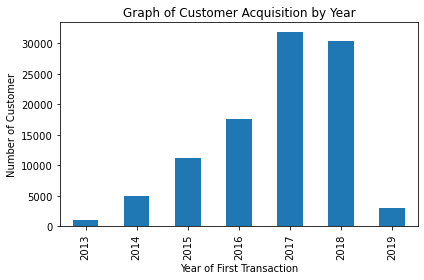

In [12]:
customer_year = retail.groupby(['Year_First_Transaction'])['Customer_ID'].count()
customer_year.plot(x = 'Year_First_Transaction', y = 'Customer_ID', kind = 'bar',
    title = 'Graph of Customer Acquisition by Year')
plt.xlabel('Year of First Transaction')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

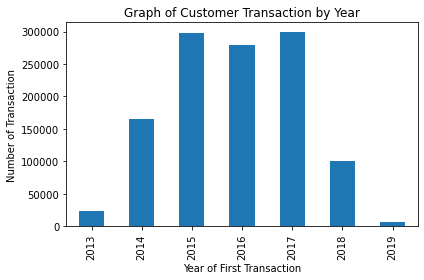

In [13]:
#Visualization of customer transaction by year
transaction_year = retail.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
transaction_year.plot(x = 'Year_First_Transaction', y = 'Count_Transaction', kind = 'bar',
    title='Graph of Customer Transaction by Year')
plt.xlabel('Year of First Transaction')
plt.ylabel('Number of Transaction')
plt.tight_layout()
plt.show()

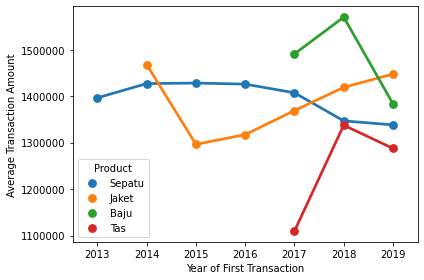

In [14]:
#Visualization of average transaction amount by year
sns.pointplot(data = retail.groupby(['Year_First_Transaction', 'Product']).mean().reset_index(),
    x = 'Year_First_Transaction',
    y = 'Average_Transaction_Amount',
    hue = 'Product')
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.xlabel('Year of First Transaction')
plt.ylabel('Average Transaction Amount')
plt.tight_layout()
plt.show()

In [15]:
#Pivot table
retail_piv = retail.pivot_table(index = 'is_churn', columns = 'Product',
                                values = 'Customer_ID', aggfunc = 'count', fill_value = 0)
print(retail_piv)

Product   Baju  Jaket  Sepatu   Tas
is_churn                           
False     1268  11123   16064  4976
True      2144  23827   33090  7508


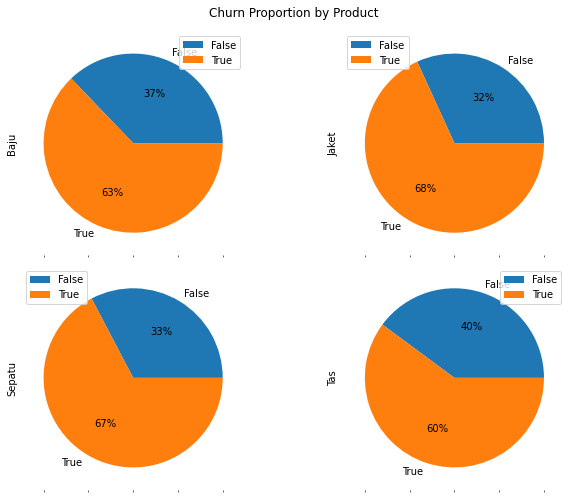

In [16]:
#Visualization of churn proportion by product
retail_piv.plot.pie(subplots = True, figsize = (10,7), layout = (-1,2),
                    autopct = '%1.0f%%', title = 'Churn Proportion by Product')
plt.tight_layout()
plt.show()

In [17]:
#Classify the count of transaction
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1.1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val = '2.2-3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val = '3.4-6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val = '4.7-10'
    else:
        val = '5.>10'
    return val

In [18]:
retail['Count_Transaction_Group'] = retail.apply(func, axis = 1)

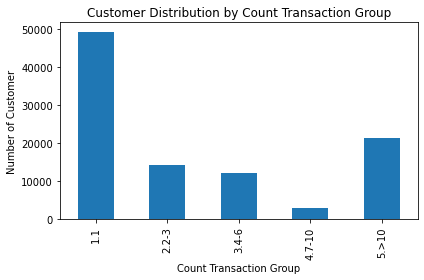

In [19]:
#Visualization of customer distribution by count transaction group
customer_transaction = retail.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
customer_transaction.plot(x = 'Count_Transaction_Group', y = 'Customer_ID', kind = 'bar',
    title = 'Customer Distribution by Count Transaction Group')
plt.xlabel('Count Transaction Group')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

In [20]:
#Classify the average of transaction amount
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 200000):
        val = '1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val = '2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val = '3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val = '4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = '6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val = '7. >5.000.000 - 10.000.000'
    else:
        val = '8. >10.000.000'
    return val

In [21]:
retail['Average_Transaction_Amount_Group'] = retail.apply(f, axis = 1)

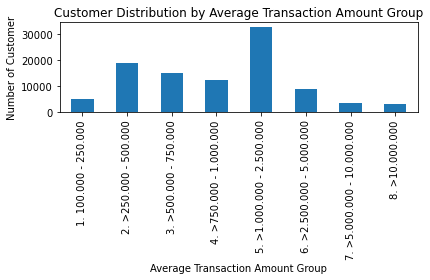

In [22]:
#Visualization of customer distribution by average transaction amount group
customer_average = retail.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
customer_average.plot(x = 'Average_Transaction_Amount_Group', y = 'Customer_ID', kind = 'bar',
    title = 'Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average Transaction Amount Group')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

In [23]:
#Feature column and target
retail['Year_Diff'] = retail['Year_Last_Transaction'] - retail['Year_First_Transaction']
feature_column = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']
X = retail[feature_column]
y = retail['is_churn']
y = y.astype('int')

In [24]:
#Split to training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [25]:
#Train, predict, and evaluate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [26]:
#Initiate logreg model
logreg = LogisticRegression()

In [27]:
#Fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression()

In [28]:
#Predict the model
y_pred = logreg.predict(X_test)

In [29]:
#Evaluate the model using confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[    1  8330]
 [    3 16666]]


([<matplotlib.axis.YTick at 0x22afc8ca9d0>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

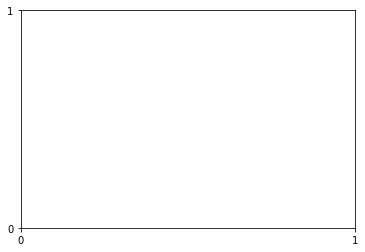

In [30]:
#Visualization of confusion matrix
import numpy as np
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

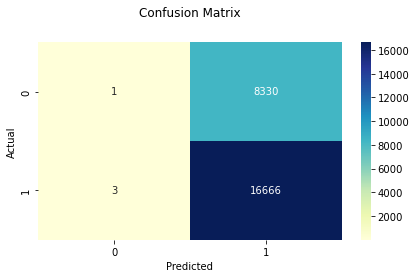

In [31]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [32]:
#Accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average = 'micro'))
print('Recall:', recall_score(y_test, y_pred, average = 'micro'))

Accuracy: 0.66668
Precision: 0.66668
Recall: 0.66668
